In [ ]:
import time
import string
import random
import matplotlib.pyplot as plt

total_time = [0, 0, 0, 0]
total_timem = [0, 0, 0, 0]
total_timeb = [0, 0, 0, 0]
recursive_calls = [0, 0, 0, 0]
recursive_callsm = [0, 0, 0, 0]
dp_table_entries_memo = [0, 0, 0, 0]
dp_table_entries_bottom_up = [0, 0, 0, 0]

def LCS(P, Q, n, m):

    if n == 0 or m == 0:
        return 0


    recursive_calls[input_sizes.index(len(P))] += 1

    if P[n - 1] == Q[m - 1]:

        return 1 + LCS(P, Q, n - 1, m - 1)
    else:

        excludeP = LCS(P, Q, n - 1, m)
        excludeQ = LCS(P, Q, n, m - 1)
        return max(excludeP, excludeQ)

def LCSmemo(P, Q, n, m):

    arr = [[-1 for _ in range(m + 1)] for _ in range(n + 1)]


    def lcs_helper(n, m):
        if n == 0 or m == 0:
            return 0
        recursive_callsm[input_sizes.index(len(P))] += 1

    .
        if arr[n][m] != -1:
            return arr[n][m]

        if P[n - 1] == Q[m - 1]:
            arr[n][m] = 1 + lcs_helper(n - 1, m - 1)
        else:
            excludeP = lcs_helper(n - 1, m)
            excludeQ = lcs_helper(n, m - 1)
            arr[n][m] = max(excludeP, excludeQ)

        dp_table_entries_memo[input_sizes.index(len(P))] += 1

        return arr[n][m]

    return lcs_helper(n, m)

def LCSbottom(P, Q, n, m):

    dp = [[0] * (m + 1) for _ in range(n + 1)]


    for i in range(n + 1):
        for j in range(m + 1):
            if i == 0 or j == 0:
                dp[i][j] = 0
            elif P[i - 1] == Q[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])


            dp_table_entries_bottom_up[input_sizes.index(len(P))] += 1


    return dp[n][m]


input_sizes = [2, 3, 5, 10]
input_sizesq = [5, 7, 9, 15]
for size in input_sizes:
    characters = string.ascii_uppercase
    P = ''.join(random.choice(characters) for _ in range(size))
    Q = ''.join(random.choice(characters) for _ in range(input_sizesq[input_sizes.index(size)]))
    n = len(P)
    m = len(Q)

    start_time = time.perf_counter()
    result = LCS(P, Q, n, m)
    end_time = time.perf_counter()
    execution_time = end_time - start_time
    total_time[input_sizes.index(size)] = execution_time

    print("Total time of recursion:", execution_time)
    print("Length of Longest Common Subsequence of recursion:", result)
    print("Recursive Calls for input size recursion", size, ":", recursive_calls[input_sizes.index(len(P))])
    print("")

    start_time = time.perf_counter()
    result = LCSmemo(P, Q, n, m)
    end_time = time.perf_counter()
    execution_timem = end_time - start_time
    total_timem[input_sizes.index(size)] = execution_timem

    print("Total time memo:", execution_timem)
    print("Length of Longest Common Subsequence memo:", result)
    print("Recursive Calls for input size memo", size, ":", recursive_callsm[input_sizes.index(len(P))])
    print("Number of DP table entries for memoization:", dp_table_entries_memo[input_sizes.index(len(P))])
    print("")

    start_time = time.perf_counter()
    result = LCSbottom(P, Q, n, m)
    end_time = time.perf_counter()
    execution_times = end_time - start_time
    total_timeb[input_sizes.index(size)] = execution_times

    print("Total time of Bottom Up:", execution_times)
    print("Length of Longest Common Subsequence of Bottom Up:", result)
    print("Recursive Calls for input size Bottom Up", size, ":", 0)
    print("Number of DP table entries for bottom-up:", dp_table_entries_bottom_up[input_sizes.index(len(P))])
    print("")
    print(10 * "----------------")




Total time of recursion: 3.544200012584042e-05
Length of Longest Common Subsequence of recursion: 0
Recursive Calls for input size recursion 2 : 20

Total time memo: 4.376299989417021e-05
Length of Longest Common Subsequence memo: 0
Recursive Calls for input size memo 2 : 14
Number of DP table entries for memoization: 10

Total time of Bottom Up: 3.38049999299983e-05
Length of Longest Common Subsequence of Bottom Up: 0
Recursive Calls for input size Bottom Up 2 : 0
Number of DP table entries for bottom-up: 18

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Total time of recursion: 0.00018180899996877997
Length of Longest Common Subsequence of recursion: 0
Recursive Calls for input size recursion 3 : 119

Total time memo: 6.192300020302355e-05
Length of Longest Common Subsequence memo: 0
Recursive Calls for input size memo 3 : 33
Number of DP table entries for memoization: 2

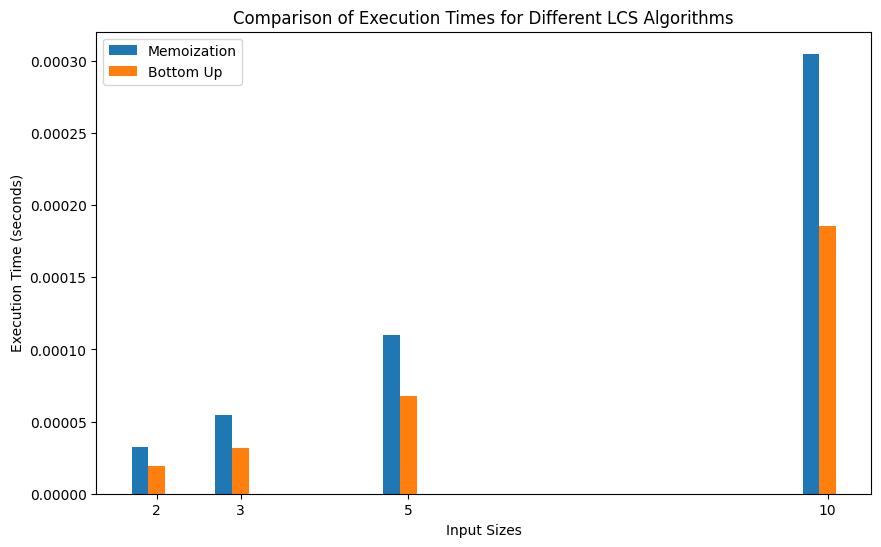

In [ ]:

input_sizes = [2, 3, 5, 10]
functions = [ 'Memoization', 'Bottom Up']


execution_times = [ total_timem, total_timeb]


plt.figure(figsize=(10, 6))
bar_width = 0.2
bar_positions = [x for x in input_sizes]

for i, func in enumerate(functions):
    plt.bar([x + i * bar_width for x in bar_positions], execution_times[i], width=bar_width, align='center', label=func)


plt.xlabel('Input Sizes')
plt.ylabel('Execution Time (seconds)')
plt.title('Comparison of Execution Times for Different LCS Algorithms')
plt.xticks([x + 0.2 for x in input_sizes], input_sizes)
plt.legend()


plt.show()



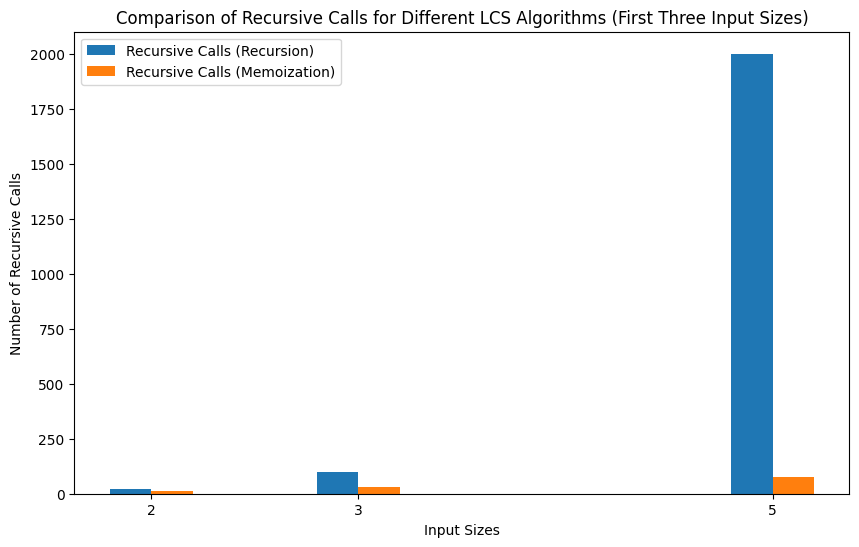

In [ ]:

plt.figure(figsize=(10, 6))
bar_width = 0.2
bar_positions = [x for x in input_sizes[:3]]

plt.bar([x - bar_width / 2 for x in bar_positions], recursive_calls[:3], width=bar_width, align='center', label='Recursive Calls (Recursion)')
plt.bar([x + bar_width / 2 for x in bar_positions], recursive_callsm[:3], width=bar_width, align='center', label='Recursive Calls (Memoization)')


plt.xlabel('Input Sizes')
plt.ylabel('Number of Recursive Calls')
plt.title('Comparison of Recursive Calls for Different LCS Algorithms (First Three Input Sizes)')
plt.xticks(bar_positions, input_sizes[:3])
plt.legend()


plt.show()

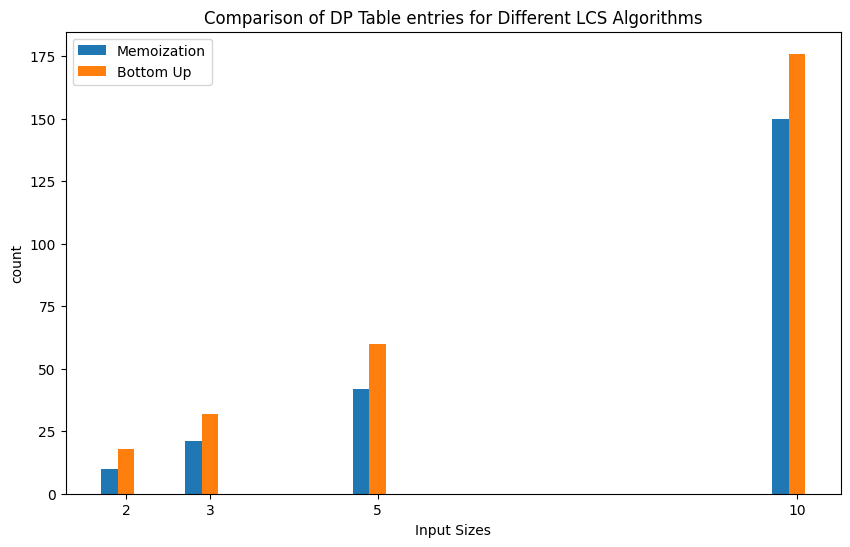

In [ ]:
functions = [ 'Memoization', 'Bottom Up']


execution_times = [ dp_table_entries_memo,dp_table_entries_bottom_up ]


plt.figure(figsize=(10, 6))
bar_width = 0.2
bar_positions = [x for x in input_sizes]

for i, func in enumerate(functions):
    plt.bar([x + i * bar_width for x in bar_positions], execution_times[i], width=bar_width, align='center', label=func)


plt.xlabel('Input Sizes')
plt.ylabel('count')
plt.title('Comparison of DP Table entries for Different LCS Algorithms')
plt.xticks([x + 0.2 for x in input_sizes], input_sizes)
plt.legend()


plt.show()

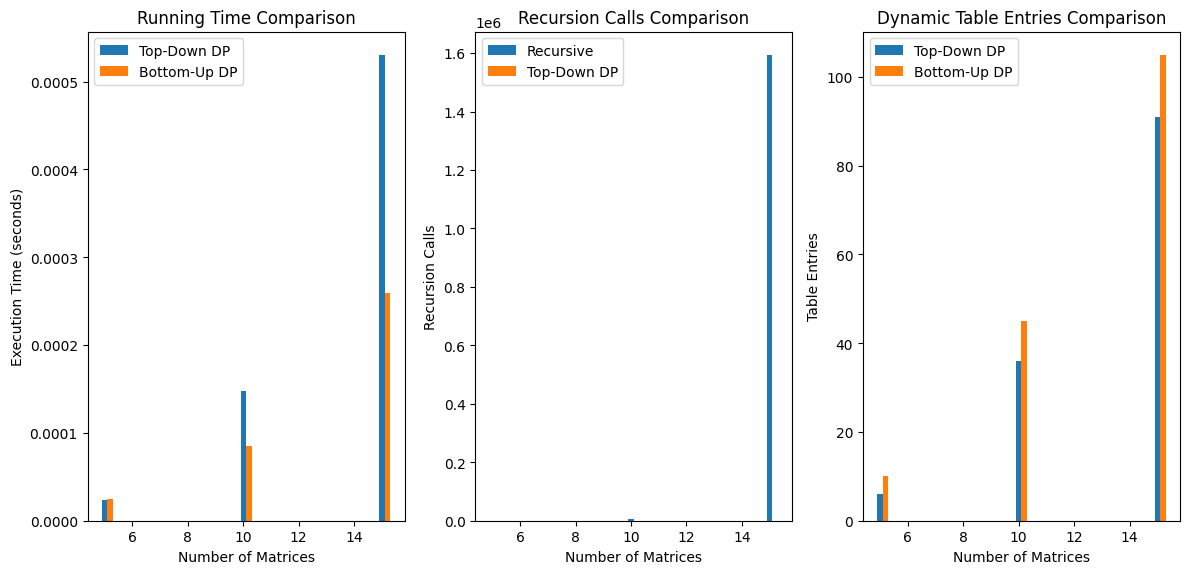